In [82]:
import tensorflow as tf
tf.__version__

'2.2.0-rc4'

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
from IPython.display import Image

## Building The Model

In [87]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-11 07:07:19--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   219MB/s    in 0.4s    

2020-05-11 07:07:20 (219 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
inception=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

In [0]:
inception.load_weights(local_weights_file)

In [0]:
for layer in inception.layers:
  layer.trainable=False

In [0]:
x=Flatten()(inception.output)

In [0]:
x=Dense(units=1024,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(units=256,activation='relu')(x)
x=Dropout(0.3)(x)
prediction = Dense(units=1, activation='sigmoid')(x)

In [0]:
model= Model(inputs=inception.input,outputs=prediction)

In [136]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 74, 74, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 74, 74, 32)   0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Loading Dataset

In [97]:

# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = '//tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

--2020-05-11 07:07:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   106MB/s    in 1.3s    

2020-05-11 07:07:31 (106 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-05-11 07:07:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

## Image Argmentation

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [99]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/training',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [100]:
validation_generator = test_datagen.flow_from_directory(
        '/tmp/validation',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [0]:
nb_train=1027
batch_size=64
nb_val=256

In [102]:
history=model.fit(
        train_generator,
        steps_per_epoch=nb_train/batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=nb_val/batch_size)

Epoch 1/10
17/16 [===============================] - 14s 837ms/step - loss: 3.9595 - accuracy: 0.8880 - val_loss: 2.0880e-09 - val_accuracy: 1.0000
Epoch 2/10
17/16 [===============================] - 13s 747ms/step - loss: 0.3521 - accuracy: 0.9854 - val_loss: 6.5909e-05 - val_accuracy: 1.0000
Epoch 3/10
17/16 [===============================] - 13s 750ms/step - loss: 0.1558 - accuracy: 0.9932 - val_loss: 2.4869e-15 - val_accuracy: 1.0000
Epoch 4/10
17/16 [===============================] - 13s 742ms/step - loss: 0.4218 - accuracy: 0.9844 - val_loss: 0.6595 - val_accuracy: 0.9688
Epoch 5/10
17/16 [===============================] - 13s 742ms/step - loss: 0.1012 - accuracy: 0.9942 - val_loss: 3.0076e-27 - val_accuracy: 1.0000
Epoch 6/10
17/16 [===============================] - 13s 750ms/step - loss: 0.0377 - accuracy: 0.9990 - val_loss: 2.0909e-20 - val_accuracy: 1.0000
Epoch 7/10
17/16 [===============================] - 13s 744ms/step - loss: 0.4012 - accuracy: 0.9942 - val_loss: 5.

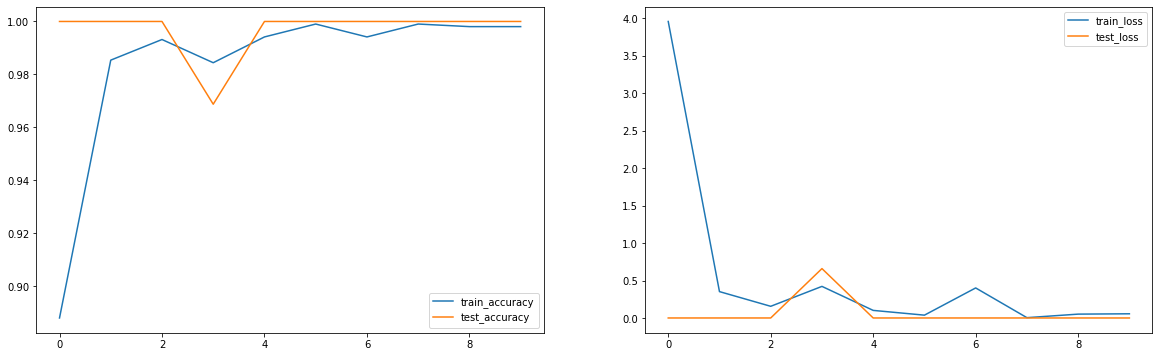

In [103]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

## Model has a quite good accuracy on validation set